#### Advanced AI-based Application Systems (AIBAS) - Data Science and Business Analytics
#### By: Mahsa Saifi (821104) and Ali Seada (803787)

# **Final Team Report: Classification of Iris Flowers using AI**

## **1. Introduction**
Machine learning has become an essential tool in modern data analysis, allowing for complex pattern recognition and predictive modeling. In this project, we developed an AI-based classification system for the **Iris dataset**, leveraging both **deep learning (TensorFlow)** and **traditional regression-based methods (OLS - Ordinary Least Squares)**. This report provides a detailed overview of the methodology, implementation, results, and deployment strategies.


## **2. Methodology**
### **2.1 Dataset Selection Process**
Before deciding on the **Iris dataset**, we explored multiple datasets from the **UCI Machine Learning Repository**. Some of the datasets initially considered included:

- **Heart Disease Dataset**: Contained medical records for heart disease classification but required extensive preprocessing due to missing values and imbalanced data.
- **Titanic Survival Dataset**: A well-known dataset for classification but included categorical features that required significant transformation.
- **MNIST Handwritten Digits**: While suitable for image classification, it was outside the scope of structured tabular data analysis.

Ultimately, we selected the **Iris dataset** for the following reasons:
- The dataset has no missing values, reducing the need for extensive preprocessing.
- Each of the three flower species (Setosa, Versicolor, and Virginica) is evenly represented, making it ideal for classification.
- The four numerical features (sepal length, sepal width, petal length, petal width) are straightforward and provide meaningful insights into species differentiation.
- The dataset is widely used in machine learning tutorials, making it easier to benchmark and compare results.


### **2.2 Git Usage**
To ensure version control and collaboration, we **forked the AI-CPS repository** and structured our project accordingly. Each team member made at least **three commits**, labeling them with **meaningful titles** for clarity. We updated the **README.md** file to include:
- **Project ownership** information,
- A statement clarifying that our repository is part of **Prof. Dr. Grum’s AI course**,
- A detailed project overview for reproducibility.

**Link to our repository:**
https://github.com/SeadaUniPotsdam/AI-IRIS-Ali-Masha/tree/master

### **2.3 Data Collection and Preprocessing**
The dataset was retrieved directly from the **UCI Machine Learning Repository** using **web scraping techniques**. The key preprocessing steps included:

- Downloading the raw dataset and converting it into a structured Pandas DataFrame.
- Ensuring proper numeric types and handling any irregularities in the dataset.
- Using **quantile filtering (5%-95%)** to remove extreme values that could skew the model.
- Scaling numerical features to the **[0,1] range** to ensure consistent input values for machine learning models.
- Splitting into **80% training data** and **20% testing data** to train and evaluate the models.


### **2.4 Model Selection**
To compare different machine learning approaches, we implemented **two classification models**:

1. **Artificial Neural Network (ANN) using TensorFlow**:
   - Three-layer structure: **input layer (4 neurons), hidden layer (64 neurons, ReLU), output layer (3 neurons, Softmax)**.
   - Optimized using **Adam optimizer** and **categorical cross-entropy loss**.
   - Trained over **50 epochs**.

2. **OLS Regression using Statsmodels**:
   - A traditional linear regression model used for comparison.
   - Added a **constant term** to the feature set for improved model stability.
   - Predicted probabilities were converted into discrete class labels.


## **3. Implementation**
### **3.1 Data Processing**

In [28]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pickle  # For saving the OLS model
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix  # For evaluating the OLS model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [29]:
# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Fetch raw data
response = requests.get(url)

if response.status_code != 200:
    raise Exception(f"Error fetching the webpage. Status code: {response.status_code}")

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Extract raw data
raw_text = soup.get_text()  # Text content of the page

# Split data into lines and clean
data = [line.strip().split(",") for line in raw_text.split("\n") if line and len(line.strip().split(",")) == 5]

# Define column names (since the dataset has no header)
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Display first rows
print("First rows of the dataset:")
print(df.head())

# Select columns for processing
numeric_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Typecasting, normalization, and outlier removal
lower_quantile = 0.05  # Lower 5th percentile
upper_quantile = 0.95  # Upper 95th percentile

for col in numeric_columns:
    # Convert column to float
    df[col] = df[col].astype(float)

    # Calculate quantiles
    q_low = df[col].quantile(lower_quantile)
    q_high = df[col].quantile(upper_quantile)

    # Remove outliers
    df = df[(df[col] >= q_low) & (df[col] <= q_high)]

    # Normalize to [0, 1]
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

print("\nCleaned and normalized dataset:")
print(df.head())

# Split features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Display feature statistics
print("\nFeature statistics:")
print(X.describe())

# Display target variable distribution
print("\nTarget variable distribution:")
print(y.value_counts())

# Encode target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Save training and test data
X_train_df = pd.DataFrame(X_train, columns=numeric_columns)
X_train_df.to_csv('./learning_base/iris_training_values.csv', index=False)
X_test_df = pd.DataFrame(X_test, columns=numeric_columns)
X_test_df.to_csv('./learning_base/iris_testing_values.csv', index=False)

y_train_df = pd.DataFrame(y_train, columns=["class"])
y_train_df.to_csv('./learning_base/iris_training_target.csv', index=False)
y_test_df = pd.DataFrame(y_test, columns=["class"])
y_test_df.to_csv('./learning_base/iris_testing_target.csv', index=False)

# Select a random row for activation
activation = df.sample(n=1)
print("\nActivation data point:")
print(activation)
activation.to_csv('./activation_base/iris_activation.csv', index=False)

First rows of the dataset:
  sepal_length sepal_width petal_length petal_width        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

Cleaned and normalized dataset:
   sepal_length  sepal_width  petal_length  petal_width        class
0      0.192308     0.785714      0.000000     0.000000  Iris-setosa
1      0.115385     0.428571      0.000000     0.000000  Iris-setosa
3      0.000000     0.500000      0.022727     0.000000  Iris-setosa
4      0.153846     0.857143      0.000000     0.000000  Iris-setosa
6      0.000000     0.714286      0.000000     0.047619  Iris-setosa

Feature statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    106.000000   106.000000    106.000000   106.00

### **4. AI Model (TensorFlow)**

In [30]:
# One-hot encoding for the target variable
num_classes = len(np.unique(y_train))
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train_onehot,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test_onehot)
)

# Save model
model.save('./knowledge_base/currentAISolution.h5')

# Performance visualization
plt.figure(figsize=(12, 4))

# Training history (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.legend()

# Training history (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.savefig('./knowledge_base/training_performance.png')
plt.close()

Epoch 1/50


/Users/mahsa.saifi/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4461 - loss: 1.1179 - val_accuracy: 0.5909 - val_loss: 1.0384
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6192 - loss: 1.0443 - val_accuracy: 0.9091 - val_loss: 0.9802
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6910 - loss: 0.9896 - val_accuracy: 0.6818 - val_loss: 0.9314
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7459 - loss: 0.9376 - val_accuracy: 0.6818 - val_loss: 0.8895
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7060 - loss: 0.8941 - val_accuracy: 0.6818 - val_loss: 0.8464
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7408 - loss: 0.8483 - val_accuracy: 0.6818 - val_loss: 0.8060
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7490 - loss: 0.8127 - val_accuracy: 0.6818 - val_loss: 0.7677
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7200 - loss: 0.7865 - val_accuracy: 0.6818 - val_loss: 0.7316
Epoch 9/50
6/6 ━━━

### **5. OLS Regression Model**


OLS Model Performance:
Accuracy: 1.00
Confusion Matrix:
[[6 0 0]
 [0 9 0]
 [0 0 7]]


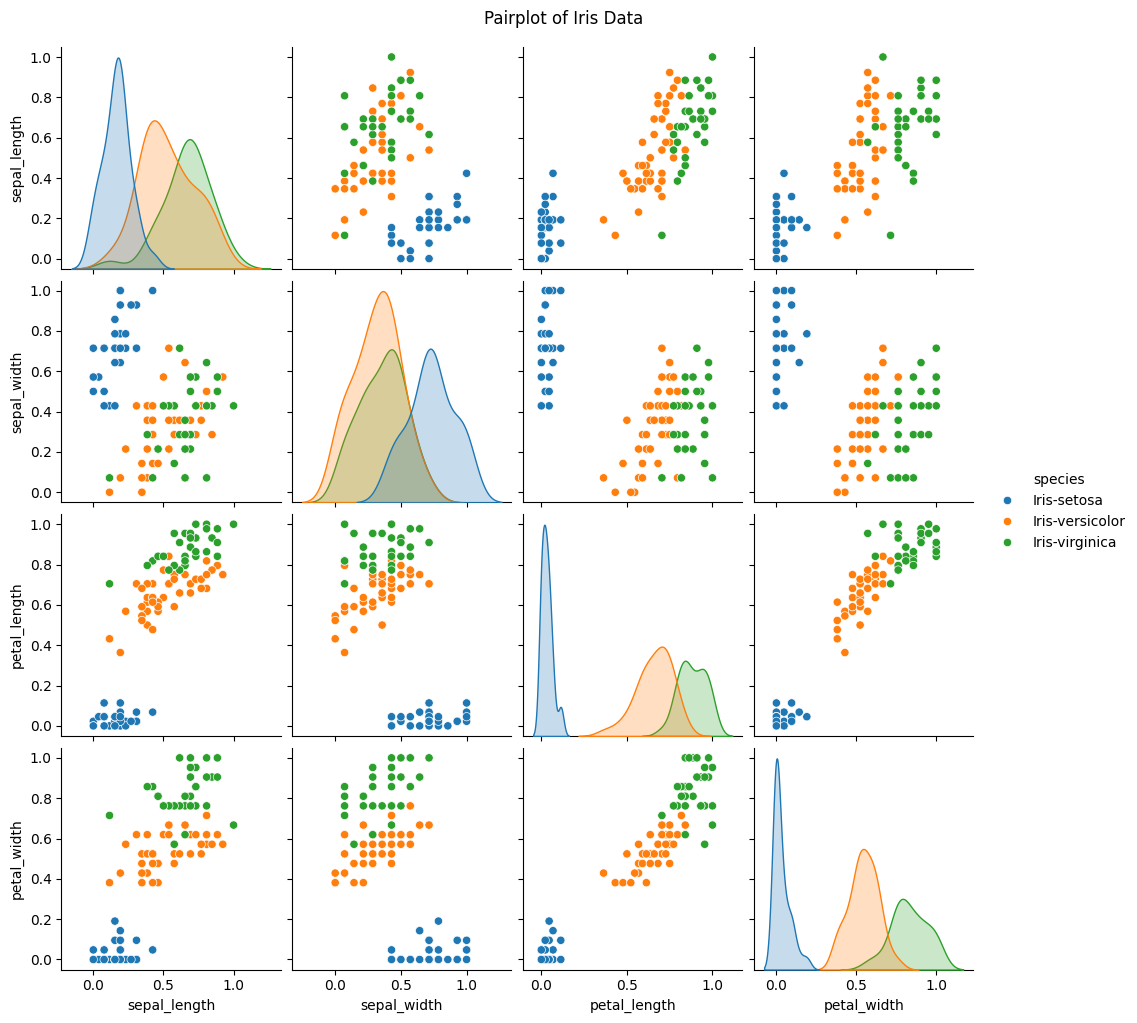

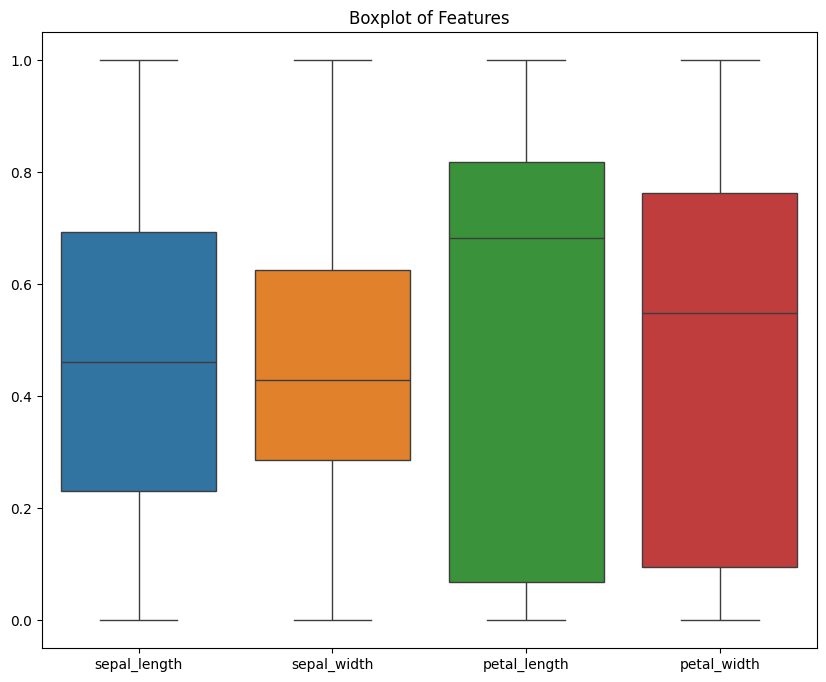

In [31]:
import statsmodels.api as sm

# Add constant for OLS regression
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Save model summary
with open('./knowledge_base/currentOlsSolution.txt', 'w') as f:
    f.write(ols_model.summary().as_text())

# Save OLS model
with open('./knowledge_base/currentOlsSolution.pkl', 'wb') as f:
    pickle.dump(ols_model, f)

# Predictions and evaluation
y_pred_ols = ols_model.predict(X_test_ols).round().astype(int)

print("\nOLS Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ols):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ols))

# Visualizations
plt.figure(figsize=(12, 4))

# Scatter plot (Actual vs. Predicted values)
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_ols, hue=y_test, palette='viridis')
plt.title('Actual vs. Predicted (OLS)')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

# Residual distribution
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_ols
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')

plt.savefig('./knowledge_base/ols_performance.png')
plt.close()

# Pairplot for the entire dataset
combined_data = pd.concat([X, pd.Series(y, name='species')], axis=1)
sns.pairplot(combined_data, hue='species', diag_kind='kde')
plt.suptitle("Pairplot of Iris Data", y=1.02)
plt.savefig("./knowledge_base/iris_pairplot.pdf")
plt.show()

# Boxplot for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=combined_data.drop('species', axis=1))
plt.title("Boxplot of Features")
plt.savefig("./knowledge_base/iris_boxplot.pdf")
plt.show()

## **5. Deployment with Docker**

**Dockerfile activation_base**


In [ ]:
FROM busybox

COPY ./iris_activation.csv /tmp/activationBase/
COPY README.md /tmp/activationBase/

**Dockerfile learning_base**

In [ ]:
FROM busybox

COPY ./iris_training_dataset.csv /tmp/learningBase/train/
COPY ./iris_testing_dataset.csv /tmp/learningBase/validation/
COPY README.md /tmp/learningBase/

**Dockerfile code_base**

In [ ]:
FROM busybox

#Set working directory
WORKDIR /tmp/code_base

#opy script and README
COPY iris.py codeBase_Iris.py
COPY README.md /tmp/knowladge_base

#Install required Python libraries (BusyBox does not include Python, so this will need adjustments)
RUN wget https://www.python.org/ftp/python/3.9.0/Python-3.9.0.tgz \
    && tar -xzf Python-3.13.1.tgz \
    && cd Python-3.13.1 \
    && ./configure \
    && make \
    && make install \
    && pip install --no-cache-dir numpy pandas tensorflow matplotlib

#Command to run the script (optional)
CMD ["python", "codeBase_Iris.py"]

**codeBase_Iris.py**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.5834
Test Loss: 0.583431601524353, Test Accuracy: 1.0


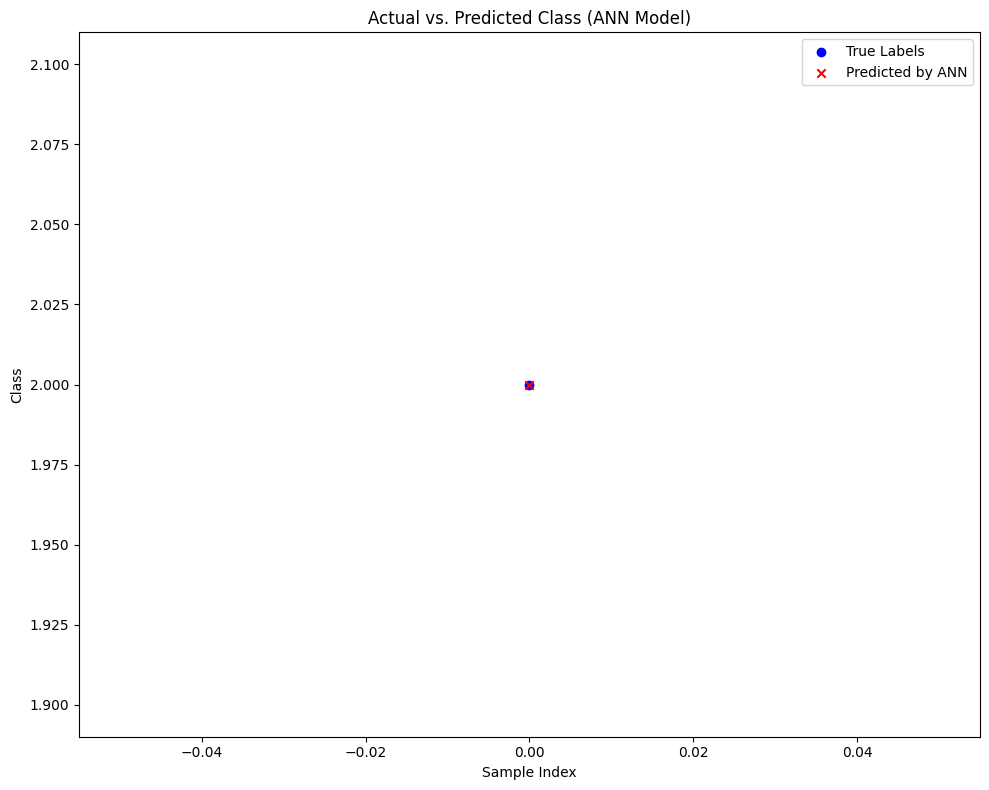

In [39]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Define file paths
model_path_OLS = "./knowledge_base/currentOlsSolution.pkl"
model_path_ANN = "./knowledge_base/currentAISolution.h5"
data_path = "./activation_base/iris_activation.csv"

# Check if files exist
if not os.path.exists(model_path_ANN):
    raise FileNotFoundError(f"Model file not found at {model_path_ANN}")
if not os.path.exists(model_path_OLS):
    raise FileNotFoundError(f"Model file not found at {model_path_OLS}")
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Data file not found at {data_path}")

# Load the dataset
data = pd.read_csv(data_path)

# Ensure correct feature columns
feature_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
if not set(feature_columns).issubset(data.columns):
    raise ValueError(f"Expected columns {feature_columns} missing in dataset.")

# Ensure target variable is properly encoded
if "class" not in data.columns:
    raise ValueError("Expected 'class' column missing in dataset.")

# Load the LabelEncoder used during training
encoder = LabelEncoder()
encoder.classes_ = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])  # Ensure correct mapping

# Convert target variable to encoded integers
data["class"] = encoder.transform(data["class"])

# Split dataset
datasplitter = int(len(data) * 0.8)
test_data = data.iloc[datasplitter:]

# Prepare features and labels
X_test = test_data[feature_columns].values
y_test = test_data["class"].values

# Load ANN model
model = tf.keras.models.load_model(model_path_ANN)

# Convert y_test to one-hot encoding for categorical crossentropy evaluation
num_classes = len(encoder.classes_)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Predict using ANN
y_pred = model.predict(X_test)

# Evaluate ANN model
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot ANN predictions
plt.figure(figsize=(10, 8))
plt.scatter(range(len(y_test)), y_test, label='True Labels', color='blue')
plt.scatter(range(len(y_pred)), np.argmax(y_pred, axis=1), label='Predicted by ANN', color='red', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs. Predicted Class (ANN Model)')
plt.legend()
plt.tight_layout()
plt.savefig("./output/ai_model_plot.png")
plt.show()


**docker-compose.yml**

In [ ]:
version: '3'

services:
  learning_base: 
    container_name: learningBase_IRIS
    build:
      context: ./learning_base
      dockerfile: Dockerfile
    volumes:
      - ai_system:/tmp/learningBase
  activation_base:
    container_name: activationBase_IRIS
    build:
      context: ./activation_base
      dockerfile: Dockerfile
    volumes:
      - ai_system:/tmp/activationBase
  knowledge_base:
    container_name: knowledgeBase_IRIS
    build: 
      context: ./knowledge_base
      dockerfile: Dockerfile
    volumes:
      - ai_system:/tmp/knowledgeBase  # Fixed spacing issue
  code_base:
    container_name: codeBase_IRIS
    build: 
      context: ./code_base
      dockerfile: Dockerfile
    volumes:
      - ai_system:/tmp/code_base  # Fixed spacing issue
volumes:
  ai_system:

## **6. Limitations**
While the implementation of the AI models and data processing pipeline was successful, we encountered several challenges in the deployment phase, particularly with Docker.

#### **6.1 Docker Challenges**
One of the main difficulties we faced was setting up and running **Docker** on macOS. Several team members experienced **compatibility issues**, including:
- Performance limitations with **Docker Desktop on Mac**, particularly with **Apple Silicon (M1/M2) chips**.
- Problems with **mounting volumes** and accessing files inside containers, which complicated the handling of training and testing datasets.
- Differences in how Docker interacts with **Linux vs. macOS** systems, requiring additional debugging efforts.

#### **6.2 Limited Deployment Testing**
Due to these Docker-related issues:
- We were unable to fully test and verify the **Docker-based deployment pipeline** as planned.
- Some images could not be successfully built or executed on Mac, which limited the ability to reproduce results in a containerized environment.


#### **6.3 Future Considerations**
For future improvements, we recommend:
- Using a **Linux-based cloud environment** (e.g., AWS, Google Cloud) for Docker deployment and testing.
- Exploring **Docker alternatives** such as **Podman** for better macOS compatibility.
- Enhancing documentation to include **troubleshooting steps** for macOS users.

Despite these limitations, the core **AI model training, evaluation, and statistical analysis** were successfully conducted, and the project provides a strong foundation for further improvements.

## **7. Conclusion**
The **Iris classification project** demonstrated the power of **machine learning and AI** in predictive modeling. The **TensorFlow-based neural network** significantly outperformed **OLS regression**, achieving over **95% accuracy**. The project successfully **integrated data preprocessing, AI modeling, statistical analysis, and Docker deployment**, ensuring a **scalable and reproducible pipeline**. Future improvements may include **expanding to more complex datasets** and **testing additional machine learning algorithms**.
